In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [30]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().values.any()

False

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop("CustomerID",axis=1,inplace=True)

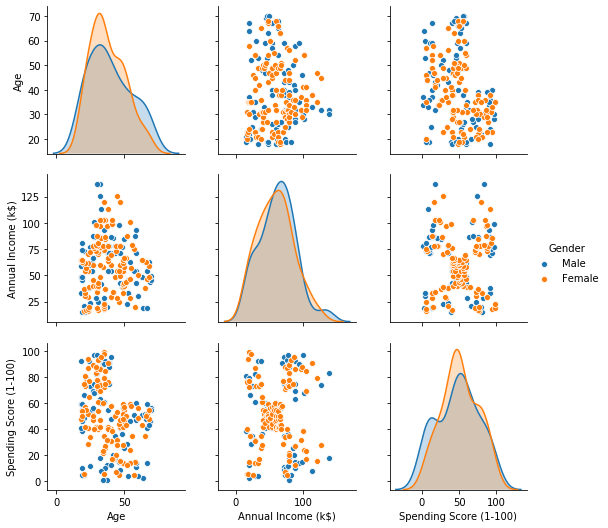

In [6]:
sns.pairplot(df, hue="Gender")

In [7]:
le = LabelEncoder()
le.fit(df["Gender"].unique())
df.Gender = le.transform(df.Gender)
le.classes_

array(['Female', 'Male'], dtype=object)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
pca = PCA(n_components=2)
result = pca.fit_transform(df)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539])

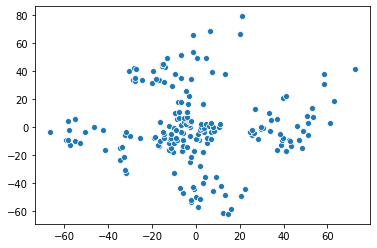

In [11]:
sns.scatterplot(x=result[:,0],y=result[:,1])

In [12]:
pca.components_

array([[-3.32728191e-04, -1.88977291e-01,  5.88622756e-01,
         7.86009366e-01],
       [ 1.57871198e-03,  1.30961404e-01,  8.08388308e-01,
        -5.73894557e-01]])

In [13]:
pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2'])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
PC-1,-0.000333,-0.188977,0.588623,0.786009
PC-2,0.001579,0.130961,0.808388,-0.573895


In [14]:
k_means = KMeans(n_clusters=5)

In [15]:
result_clust = k_means.fit_predict(result)

In [16]:
result_clust

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

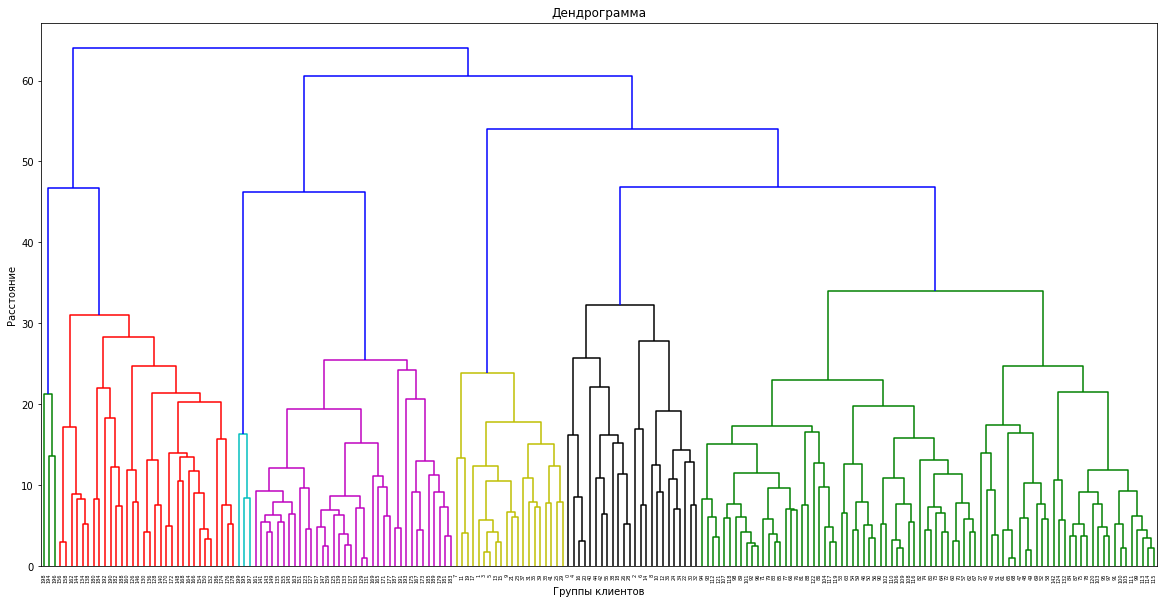

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(df, result_clust)

plt.figure(figsize=(20,10))
plt.title('Дендрограмма')
plt.xlabel('Группы клиентов')
plt.ylabel('Расстояние')
dendrogram = sch.dendrogram(sch.linkage(df, method = 'average'))

In [18]:
df_new = pd.DataFrame({"ClientClass":result_clust,"PCA_1":result[:,0],"PCA_2":result[:,1]})

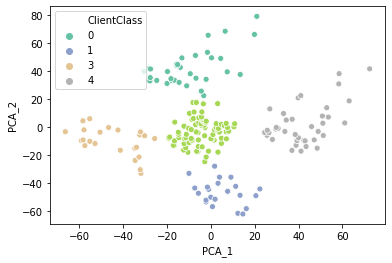

In [19]:
sns.scatterplot(x="PCA_1",y="PCA_2",hue="ClientClass",data=df_new,palette="Set2")

In [21]:
k_means.cluster_centers_

array([[-10.22445521,  42.33140596],
       [  4.98536192, -46.67336912],
       [ -4.41026389,  -3.10070422],
       [-44.38675468, -10.05043814],
       [ 41.55103875,   1.87087541]])

In [28]:
data = pca.inverse_transform(k_means.cluster_centers_)

In [29]:
pd.DataFrame(data,columns=df.columns,index = [1,2,3,4,5])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,0.510231,46.325970,88.761867,17.869719
2,0.364657,31.795470,25.764292,80.904134
3,0.436572,39.277367,55.457445,48.512969
4,0.438902,45.921869,26.308289,21.079487
5,0.429128,31.242810,86.530281,81.785820
